#### COMPANION WORKBOOK

# Data Cleaning

To make the most out of this program, we strongly recommend you to:
1. First practice writing and implementing all of the code from Coding Section of the online module.
2. Then, freely experiment with and explore any interesting or confusing concepts. Simply insert new code cells and then use the help of Google and official documentation.
3. Finally, tackle all of the exercises at the end. They will help you tie everything together and **learn in context.**

#### <span style="color:#555">MODULE CODE SANDBOX</span>

Use this space to practice writing and implementing all of the code from Coding Section of the online module. Insert new code cells as needed, and feel free to write notes to yourself in Markdown.

## I. Drop Unwanted Observations

In [42]:
import pandas as pd
pd.set_option('display.max_columns', 100)

import numpy as np

from matplotlib import pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set_style('darkgrid')


In [43]:
df = pd.read_csv('real_estate_data.csv')
df.head()

,tx_price,beds,baths,sqft,year_built,lot_size,property_type,exterior_walls,roof,basement,restaurants,groceries,nightlife,cafes,shopping,arts_entertainment,beauty_spas,active_life,median_age,married,college_grad,property_tax,insurance,median_school,num_schools,tx_year
0,295850,1,1,584,2013,0,Apartment / Condo / Townhouse,Wood Siding,NaN,NaN,107,9,30,19,89,6,47,58,33.0,65.0,84.0,234.0,81.0,9.0,3.0,2013
1,216500,1,1,612,1965,0,Apartment / Condo / Townhouse,Brick,Composition Shingle,1.0,105,15,6,13,87,2,26,14,39.0,73.0,69.0,169.0,51.0,3.0,3.0,2006
2,279900,1,1,615,1963,0,Apartment / Condo / Townhouse,Wood Siding,NaN,NaN,183,13,31,30,101,10,74,62,28.0,15.0,86.0,216.0,74.0,8.0,3.0,2012
3,379900,1,1,618,2000,33541,Apartment / Condo / Townhouse,Wood Siding,NaN,NaN,198,9,38,25,127,11,72,83,36.0,25.0,91.0,265.0,92.0,9.0,3.0,2005
4,340000,1,1,634,1992,0,Apartment / Condo / Townhouse,Brick,NaN,NaN,149,7,22,20,83,10,50,73,37.0,20.0,75.0,88.0,30.0,9.0,3.0,2002


In [44]:
df.describe()

,tx_price,beds,baths,sqft,year_built,lot_size,basement,restaurants,groceries,nightlife,cafes,shopping,arts_entertainment,beauty_spas,active_life,median_age,married,college_grad,property_tax,insurance,median_school,num_schools,tx_year
count,1883.000000,1883.000000,1883.000000,1883.000000,1883.000000,1.883000e+03,1657.0,1883.000000,1883.000000,1883.000000,1883.000000,1883.000000,1883.000000,1883.000000,1883.000000,1883.000000,1883.000000,1883.000000,1883.000000,1883.000000,1883.000000,1883.000000,1883.000000
mean,422839.807754,3.420605,2.579926,2329.398832,1982.963887,1.339262e+04,1.0,40.210303,4.505045,5.074881,5.325013,40.802443,3.394052,23.416888,15.835369,38.601168,69.091875,65.085502,466.777483,140.454063,6.502921,2.793415,2007.111524
std,151462.593276,1.068554,0.945576,1336.991858,20.295945,4.494930e+04,0.0,46.867012,4.491029,8.464668,7.539309,53.539296,4.699787,25.776916,17.667717,6.634110,19.659767,16.953165,231.656645,72.929765,1.996109,0.505358,5.196898
min,200000.000000,1.000000,1.000000,500.000000,1880.000000,0.000000e+00,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22.000000,11.000000,5.000000,88.000000,30.000000,1.000000,1.000000,1993.000000
25%,300000.000000,3.000000,2.000000,1345.000000,1970.000000,1.542000e+03,1.0,7.000000,1.000000,0.000000,0.000000,6.000000,0.000000,4.000000,4.000000,33.000000,58.000000,54.000000,320.000000,94.000000,5.000000,3.000000,2004.000000
50%,392000.000000,3.000000,3.000000,1907.000000,1986.000000,6.098000e+03,1.0,23.000000,3.000000,2.000000,3.000000,22.000000,2.000000,15.000000,10.000000,38.000000,73.000000,66.000000,426.000000,125.000000,7.000000,3.000000,2007.000000
75%,525000.000000,4.000000,3.000000,3005.000000,2000.000000,1.176100e+04,1.0,58.000000,7.000000,6.000000,6.000000,51.000000,5.000000,35.000000,21.000000,43.000000,84.000000,78.000000,569.000000,169.000000,8.000000,3.000000,2011.000000
max,800000.000000,5.000000,6.000000,8450.000000,2015.000000,1.220551e+06,1.0,266.000000,24.000000,54.000000,47.000000,340.000000,35.000000,177.000000,94.000000,69.000000,100.000000,100.000000,4508.000000,1374.000000,10.000000,4.000000,2016.000000


In [45]:
df.describe(include=['object'])

,property_type,exterior_walls,roof
count,1883,1660,1529
unique,2,16,16
top,Single-Family,Brick,Composition Shingle
freq,1080,687,1179


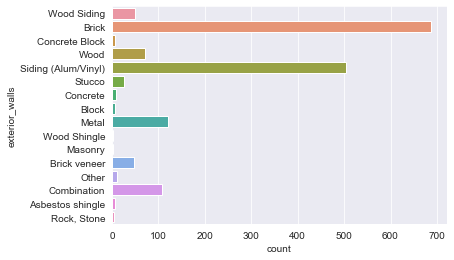

In [46]:
sns.countplot(y='exterior_walls', data=df)
plt.show()

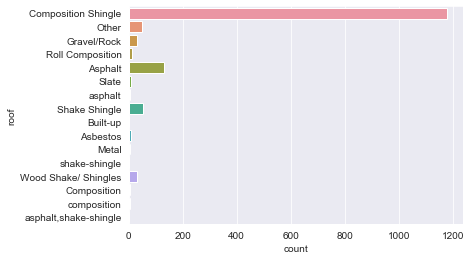

In [47]:
sns.countplot(y='roof', data=df)
plt.show()

##### 1. Drop duplicates

In [48]:
df = df.drop_duplicates()
print(df.shape)

(1883, 26)


##### 2. Remove irrelevant observations
These are data that don't actually belong to what we are trying to model. Usually requires domain knowledge. Look at the data from the Exploratory Analysis section and look for such data (for egs if the dataset contained properties from other countries or other property types)

Seems like there are no irrelevant samples hence we don't need to remove any.

## II. Fix Structural Errors

##### 1. Check for variables that should actually be INDICATOR variables (i.e. they should be either 0 or 1)
Egs. the 'basement' feature had values of either '1' or 'NaN'.

In [49]:
print(df.basement.unique())

[nan  1.]


In [50]:
# Note that we call inplace=True to update the values of the dataframe without creating a new copy.
# If we don't pass in this argument, we will need to explicitly overwrite the original column like this:
# df['basement'] = df.basement.fillna(0)
df.basement.fillna(0, inplace=True)

In [51]:
print(df.basement.unique())

[0. 1.]


##### 2. Check for typos or inconsistent capitalization
Look at the categorical distributions for the 'roof' feature above.
We can see that:
1. asphalt should be Asphalt
2. composition should be Composition
3. shake-shingle should be Shake Shingle
4. We can also change 'asphalt, shake-shingle' to 'Shake Shingle'

###### We use the .replace() command.
1. The first argument is the class to replace. This can also be a list of classes
2. The second argument is the new class label
3. Again, we are setting inplace=True


In [52]:
df.roof.replace('composition', 'Composition', inplace=True)

df.roof.replace('asphalt', 'Asphalt', inplace=True)

df.roof.replace(['shake-shingle', 'asphalt,shake-shingle'], 'Shake Shingle', inplace=True)

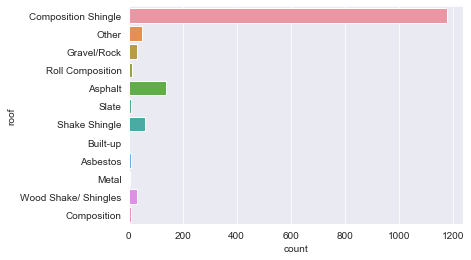

In [53]:
sns.countplot(y='roof', data=df)
plt.show()

## III. Remove "Guilty" Outliers

##### 1. Suspicious measurements that are unlikely to be real data 
    - eg. a house tx in 1750 when the rest are after 1990
    - a house tx price of 0

##### 2. Outliers that belong to a different population
    - A historic site that sold for 3.5 million dollars (when all others are homes that sold for under 800,000)
    - A home with a lot size over 1,000,000 sqft (when all others have lots under 500,000 sqft)

##### 3. Different application
    - what types of properties will you be applying the model to in the future?
    - does retaining/removing certain data be helpful/detrimental to future applications?

### Option 1: Use boxplots (the standard)
You can start with the boxplot of your target variable.

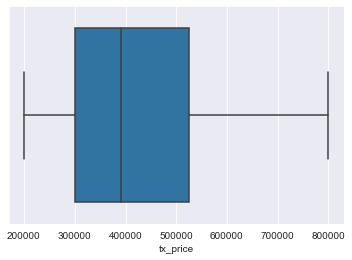

In [54]:
sns.boxplot(df.tx_price)
plt.show()

###### Intepretation
- The **two vertical bars** on the ends are the min and max values
- The **box in the middle** represent the range between the 25th and 75th percentile (unterquartile range)
- The **vertical bar** in the box represents the median

### Option 2: Use Seaborn's Violinplot (Recommended)
A boxplot only shows summary statistics such as median and interquartile range. A violinplot shows the entire probability distribution.

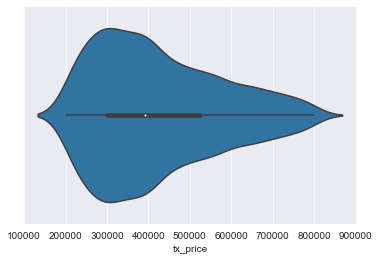

In [55]:
sns.violinplot('tx_price', data=df)
plt.show()

###### Intepretation
- In the violinplot, the **thin horizontal bar** represents the range (min-to-max) of the data
- The **thick horizontal bar** is the interquartile range (25th to 75th percentile)
- The **white dot** is the median
- The **thickness of the violin** represents the estimated probability density

## IV. Handle Missing Data

**Unfortunately, from experience, the 2 most commonly recommended ways of dealing with missing data suck**

They are:
1. Dropping observations that have missing values
2. Imputing the missing values based on values from other observations

When you remove observations, you remove information. In the real world, we need to make predictions on new data even if some of the features are missing!

Imputing sucks because a loss of information occurs when we fill in data, no matter how sophisticated our imputation model is. Missingness is almost always predictive, and should tell your model if a value was missing. Even if you build a model to impute your values, you are not adding any real information. 

**In short,'** you always want to let your model know that a value was missing because missingness is informative

**Instead, we just label missing data as 'Missing', hence creating a new category.**

In [56]:
# find out and count the missing categorical data
df.select_dtypes(include=['object']).isnull().sum()

property_type       0
exterior_walls    223
roof              354
dtype: int64

In [57]:
# label missing categorical values as missing
df['exterior_walls'].fillna('Missing', inplace=True)
df['roof'].fillna('Missing', inplace=True)

#### Accounting for missing data in numerical features

We employ the technique of **flagging and filling**:

We flag the row with an indicator variable of missingness:
1. 0 if not missing
2. 1 if missing

In [58]:
# display number of missing values by feature (numeric)
df.select_dtypes(exclude=['object']).isnull().sum()

tx_price              0
beds                  0
baths                 0
sqft                  0
year_built            0
lot_size              0
basement              0
restaurants           0
groceries             0
nightlife             0
cafes                 0
shopping              0
arts_entertainment    0
beauty_spas           0
active_life           0
median_age            0
married               0
college_grad          0
property_tax          0
insurance             0
median_school         0
num_schools           0
tx_year               0
dtype: int64

Looks like there are no missing data for our numerical features

**Quick note on Time Series Data**

This tactic of flagging and filling is best used for **Cross-sectional data**:
- Data that is collected for many subjects at the same point in time
- 1 observation per subject

For **time series data**, we use interpolation.

Time series data is data collected for one subject throughout many points in time.

#### <span style="color:#555">EXERCISES</span>

Complete each of the following exercises.

## <span style="color:RoyalBlue">Exercise 2.1 - Coding Section Checkpoint</span>

Before moving on, it's imperative that you've been following along the online Coding Section of this module. Those are core to each module and often contain **mission-critical code**, which means that the following modules REQUIRE you to have run that code.

#### A.) First, check that you've correctly converted 'basement' into an indicator variable. Print the unique values of 'basement'.

In [59]:
print(df.basement.unique())

[0. 1.]


<strong style="color:RoyalBlue">Expected output:</strong>
<pre>
[0. 1.]
</pre>

#### B.) Next, confirm that you've fixed the typos and inconsistent capitalization in the 'roof' feature.

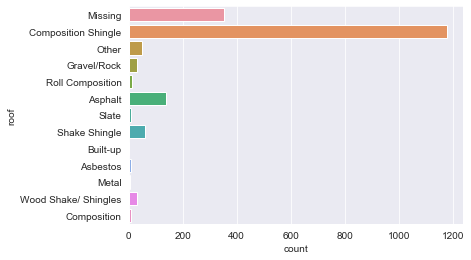

In [60]:
sns.countplot(y='roof', data=df)
plt.show()

<strong style="color:RoyalBlue">Expected output:</strong>
<img src="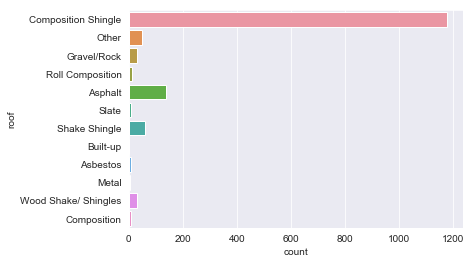&#10;">

## <span style="color:RoyalBlue">Exercise 2.2 - Repairing Walls</span>

In the coding section, we fixed the structural issues for the 'roof' feature. In this exercise, let's do the same for the other two categorical features, starting with **'exterior_walls'.**

#### A.) Just as refresher, plot the current class distribution for the 'exterior_walls' feature.

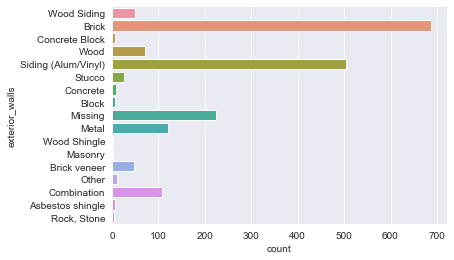

In [61]:
sns.countplot(y='exterior_walls', data=df)
plt.show()

<strong style="color:RoyalBlue">Expected output:</strong>
<img src="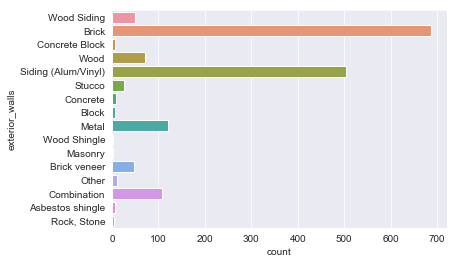&#10;">

As a reminder:
* <code style="color:crimson">'Rock, Stone'</code> should be <code style="color:crimson">'Masonry'</code>
* <code style="color:crimson">'Concrete'</code> and <code style="color:crimson">'Block'</code> should both just be <code style="color:crimson">'Concrete Block'</code>

Let's fix those issues in this exercise.

#### B.) First, replace any instances of <code style="color:steelblue">'Rock, Stone'</code> with <code style="color:steelblue">'Masonry'</code> instead.
* Remember to do it "inplace."

In [62]:
df.exterior_walls.replace('Rock, Stone', 'Masonry', inplace=True)

#### C.) Next, replace any instances of <code style="color:steelblue">'Concrete'</code> or <code style="color:steelblue">'Block'</code> with <code style="color:steelblue">'Concrete Block'</code> instead.
* Remember to do it "inplace."

In [63]:
df.exterior_walls.replace(['Concrete', 'Block'], 'Concrete Block', inplace=True)

#### D.) Great, now plot the bar plot of <code style="color:steelblue">'exterior_walls'</code> to see its new distribution.

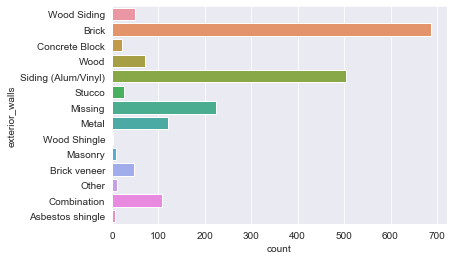

In [64]:
sns.countplot(y='exterior_walls', data=df)
plt.show()

<strong style="color:RoyalBlue">Expected output:</strong>
<img src="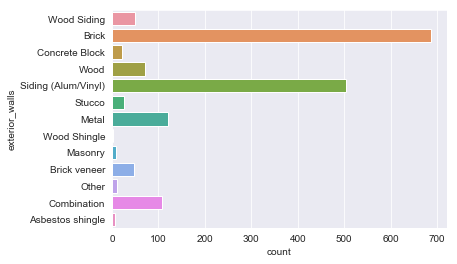&#10;">

Two down, one to go. Do you remember the name of the last categorical feature? If not, no worries. It's very simple to check, and it's very common to do these ad-hoc checks throughout your project.

#### E.) List the categorical features in the dataset.
* **Tip:** What is the 'dtype' for categorical features?

In [65]:
df.describe(include=['object'])

,property_type,exterior_walls,roof
count,1883,1883,1883
unique,2,14,13
top,Single-Family,Brick,Composition Shingle
freq,1080,687,1179


<strong style="color:RoyalBlue">Expected output:</strong>
<pre>
property_type     object
exterior_walls    object
roof              object
dtype: object
</pre>

#### F.) Finally, display the class distributions for the 'property_type' feature.
* Does it appear to have any obvious structural errors?

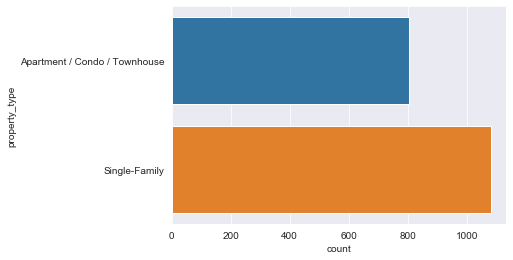

In [66]:
sns.countplot(y='property_type', data=df)
plt.show()

<strong style="color:RoyalBlue">Expected output:</strong>
<img src="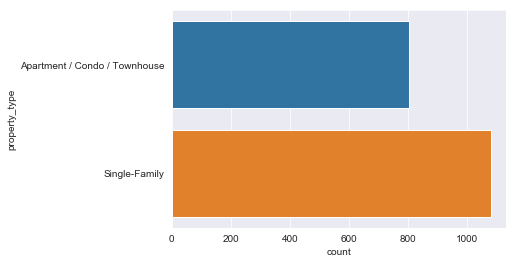&#10;">

## <span style="color:RoyalBlue">Exercise 2.3 - The Music of Outliers</span>

#### A.) Plot the violin plots for <code style="color:steelblue">'beds'</code>, <code style="color:steelblue">'sqft'</code>, and <code style="color:steelblue">'lot_size'</code>.
* **Tip:** If you want to plot multiple charts in the same code cell, remember to separate them by <code style="color:steelblue">plt.show()</code>, or else they will overlap.
* Among those features, do any look like they have potential outliers?

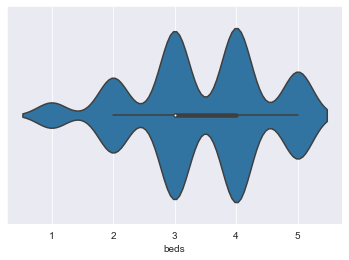

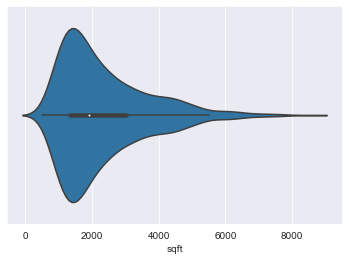

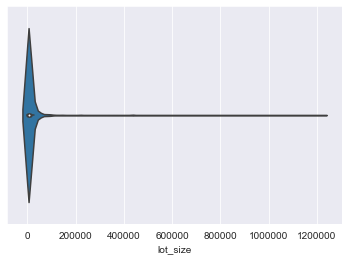

In [67]:
# Violin plot of beds
sns.violinplot('beds', data=df)
plt.show()

# Violin plot of sqft
sns.violinplot('sqft', data=df)
plt.show()

# Violin plot of lot_size
sns.violinplot('lot_size', data=df)
plt.show()

Among those three features, it looks like <code style="color:steelblue">lot_size</code> has a potential outlier! Look at its long and skinny tail. Let's look at the largest 5 lot sizes just to confirm.

#### B.) Sort <code style="color:steelblue">df.lot_size</code> and display the top 5 samples.
* You can sort a Series with the <code style="color:steelblue">.sort_values()</code> function.
* **Tip:** <code style="color:steelblue">.sort_values()</code> has an argument called <code style="color:steelblue">ascending=</code>. By default, it's <code style="color:steelblue">True</code>
* **Tip:** You can chain functions together. This exercise can be completed in 1 line of code.

In [68]:
df['lot_size'].sort_values(ascending=False).head()

102     1220551
1111     436471
1876     436035
1832     436035
1115     435600
Name: lot_size, dtype: int64

<strong style="color:RoyalBlue">Expected output:</strong>
<pre>
102     1220551
1111     436471
1876     436035
1832     436035
1115     435600
Name: lot_size, dtype: int64
</pre>

The largest property has a lot_size of 1,220,551 sqft. The next largest has a lot_size of only 436,471 sqft. Holy smokes! Let's look at this observation a bit closer.

#### C.) Display the entire row for that observation with the huge lot size.
* How many bedrooms and bathrooms does the property have?
* What's its property type?
* What's its transaction price?
* **Do you think this observation could be a "guilty" outlier? Why?**

In [69]:
df.loc[df['lot_size']==1220551]

,tx_price,beds,baths,sqft,year_built,lot_size,property_type,exterior_walls,roof,basement,restaurants,groceries,nightlife,cafes,shopping,arts_entertainment,beauty_spas,active_life,median_age,married,college_grad,property_tax,insurance,median_school,num_schools,tx_year
102,292999,2,1,875,1950,1220551,Apartment / Condo / Townhouse,Brick,Missing,0.0,63,11,11,8,39,18,42,44,33.0,35.0,87.0,230.0,79.0,6.0,3.0,2014


**Looks like we have an outlier here**:

- the tx_price is at the low end of the range, despite it having such a huge lot size
- look at the number of beds and baths

<strong style="color:RoyalBlue">Expected output:</strong>

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>tx_price</th>
      <th>beds</th>
      <th>baths</th>
      <th>sqft</th>
      <th>year_built</th>
      <th>lot_size</th>
      <th>property_type</th>
      <th>exterior_walls</th>
      <th>roof</th>
      <th>basement</th>
      <th>restaurants</th>
      <th>groceries</th>
      <th>nightlife</th>
      <th>cafes</th>
      <th>shopping</th>
      <th>arts_entertainment</th>
      <th>beauty_spas</th>
      <th>active_life</th>
      <th>median_age</th>
      <th>married</th>
      <th>college_grad</th>
      <th>property_tax</th>
      <th>insurance</th>
      <th>median_school</th>
      <th>num_schools</th>
      <th>tx_year</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>102</th>
      <td>292999</td>
      <td>2</td>
      <td>1</td>
      <td>875</td>
      <td>1950</td>
      <td>1220551</td>
      <td>Apartment / Condo / Townhouse</td>
      <td>Brick</td>
      <td>NaN</td>
      <td>0.0</td>
      <td>63</td>
      <td>11</td>
      <td>11</td>
      <td>8</td>
      <td>39</td>
      <td>18</td>
      <td>42</td>
      <td>44</td>
      <td>33.0</td>
      <td>35.0</td>
      <td>87.0</td>
      <td>230.0</td>
      <td>79.0</td>
      <td>6.0</td>
      <td>3.0</td>
      <td>2014</td>
    </tr>
  </tbody>
</table>

#### D.) Since all of the other observations are below 500,000 sqft, let's remove observations with <code style="color:steelblue">lot_size</code> greater than 500,000 sqft.
* You can use a boolean mask to do so (filter to keep only wanted observations).
* Overwrite the existing <code style="color:steelblue">df</code> object
* Print the length of the new <code style="color:steelblue">df</code> object.

In [70]:
df = df[df['lot_size'] < 500000]
print(len(df))

1882


<strong style="color:RoyalBlue">Expected output:</strong>
<pre>
1882
</pre>

## <span style="color:RoyalBlue">Exercise 2.4 - Missing But Not Lost</span>

In the Coding Section, we already labeled missing values in the 'exterior_walls' feature as 'Missing'. Now, we'll write a loop for labeling missing values in ALL of our categorical features so that we can dynamically handle as many categorical features as necessary.

#### A.) Write a loop that fills all the missing values for categorical features with the value <code style="color:steelblue">'Missing'</code>.
* **Tip:** There's a shortcut for looping through categorical column names:

<pre style="color:#bbb">
for column in <strong style="color:steelblue">df.select_dtypes(include=['object'])</strong>:
    # code block
</pre>

In [71]:
for column in df.select_dtypes(include=['object']):
    df[column].fillna("Missing", inplace=True)

#### B.) Now, display the number of missing values for each categorical feature.

In [72]:
df.select_dtypes(include=['object']).isnull().sum()

property_type     0
exterior_walls    0
roof              0
dtype: int64

<strong style="color:RoyalBlue">Expected output:</strong>
<pre>
property_type     0
exterior_walls    0
roof              0
dtype: int64
</pre>

#### C.) Just for practice, find and count missing values in your numerical features.

In [74]:
df.select_dtypes(exclude=['object']).isnull().sum()

tx_price              0
beds                  0
baths                 0
sqft                  0
year_built            0
lot_size              0
basement              0
restaurants           0
groceries             0
nightlife             0
cafes                 0
shopping              0
arts_entertainment    0
beauty_spas           0
active_life           0
median_age            0
married               0
college_grad          0
property_tax          0
insurance             0
median_school         0
num_schools           0
tx_year               0
dtype: int64

<strong style="color:RoyalBlue">Expected output:</strong>
<pre>
tx_price              0
beds                  0
baths                 0
sqft                  0
year_built            0
lot_size              0
basement              0
restaurants           0
groceries             0
nightlife             0
cafes                 0
shopping              0
arts_entertainment    0
beauty_spas           0
active_life           0
median_age            0
married               0
college_grad          0
property_tax          0
insurance             0
median_school         0
num_schools           0
tx_year               0
dtype: int64
</pre>

#### D.) Save your cleaned dataframe as <code style="color:steelblue">'cleaned_df.csv'</code>.

Before we move on to the next module, let's save the new dataframe we worked hard to clean.
* We'll use Pandas's <code style="color:steelblue">.to_csv()</code> function.
* Set <code style="color:steelblue">index=<span style="color:crimson">None</span></code> so that Pandas drops the indices and only stores the actual data in the CSV.

In [76]:
df.to_csv('cleaned_df.csv', index=None)

* Now we can use <code style="color:steelblue">'cleaned_df.csv'</code> in all the other modules!

Congratulations for making it through the Data Cleaning module! Data cleaning is not the most exciting thing in the world, but it can literally make or break your project. As a reminder, here are a few things you did in this module:
* You confirmed that the dataset doesn't have any duplicate and irrelevant observations.
* You fixed various structural errors, such as mislabeled classes.
* You removed an outlier after plotting violin plots.
* And you labeled missing data in your categorical features.

All of this cleaning will be extremely helpful for the remaining modules. In the next module, Feature Engineering, you'll use your cleaned dataset to create new features that will improve model performance.